**Nombre:** Ricardo Antonio Peña Figueroa



---



# **Descripción del Dataset**

El siguiente conjunto de datos proporciona información detallada sobre pedidos minoristas, incluidos el rendimiento de las ventas, los detalles de los clientes y la logística de los envíos.




In [7]:
#Carga de librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [1]:
#instalacion de ydata_profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
from ydata_profiling import ProfileReport

     / 17.9 MB 20.8 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 17.2 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=390938 sha256=9f19c53df5a1ce2f9621363e7d6eda701d522674107f3825d72690fad9f434c7
  Stored in directory: /tmp/pip-ephem-wheel-cache-4spv78u3/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6e6f49a13879545fc78475a99a53d3dc41929e28620fa5134bebbda364539665
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Succe

In [8]:
#Carga de dataset
df = pd.read_excel('retail-supply-chain-sales.xlsx')

In [8]:
# Tamaño del dataset
print("Filas y columnas:", df.shape)

Filas y columnas: (9994, 23)


In [9]:
# Tipos de datos
print(df.dtypes)

Row ID                          int64
Order ID                       object
Order Date             datetime64[ns]
Ship Date              datetime64[ns]
Ship Mode                      object
Customer ID                    object
Customer Name                  object
Segment                        object
Country                        object
City                           object
State                          object
Postal Code                     int64
Region                         object
Retail Sales People            object
Product ID                     object
Category                       object
Sub-Category                   object
Product Name                   object
Returned                       object
Sales                         float64
Quantity                        int64
Discount                      float64
Profit                        float64
dtype: object


In [11]:
# Primeras filas
df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-12-06 2016-12-06    Second Class    DV-13045   
3       4  US-2015-108966 2015-11-10 2015-11-10  Standard Class    SO-20335   
4       5  US-2015-108966 2015-11-10 2015-11-10  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Retail Sales People       Product ID         Category Sub-Category  \
0   Cassandra Brandow  FUR-BO-10001798        Furniture    Bookcases   
1   Cassandra Brandow  FUR-CH-10000454        Furniture       Chairs   
2       Anna Andreadi  OFF-LA-10000240  Office Supplies       Labels   
3   Cassandra Brandow  FUR-TA-10000577        Furniture       Tables   
4   Cassandra Brandow  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name Returned     Sales  \
0                  Bush Somerset Collection Bookcase      Not  261.9600   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...      Not  731.9400   
2  Self-Adhesive Address Labels for Typewriters b...      Not   14.6200   
3      Bretford CR4500 Series Slim Rectangular Table      Not  957.5775   
4                     Eldon Fold 'N Roll Cart System      Not   22.3680   

  Quantity Discount    Profit  
0        2     0.00   41.9136  
1        3     0.00  219.5820  
2        2     0.00    6.8714  
3        5     0.45 -383.0310  
4        2     0.20    2.5164  

[5 rows x 23 columns]

In [13]:
# Últimas filas
df.tail()

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-04-05 2017-09-05    Second Class   

     Customer ID     Customer Name   Segment        Country         City  ...  \
9989    TB-21400  Tom Boeckenhauer  Consumer  United States        Miami  ...   
9990    DB-13060       Dave Brooks  Consumer  United States   Costa Mesa  ...   
9991    DB-13060       Dave Brooks  Consumer  United States   Costa Mesa  ...   
9992    DB-13060       Dave Brooks  Consumer  United States   Costa Mesa  ...   
9993    CC-12220      Chris Cortes  Consumer  United States  Westminster  ...   

     Retail Sales People       Product ID         Category Sub-Category  \
9989   Cassandra Brandow  FUR-FU-10001889        Furniture  Furnishings   
9990       Anna Andreadi  FUR-FU-10000747        Furniture  Furnishings   
9991       Anna Andreadi  TEC-PH-10003645       Technology       Phones   
9992       Anna Andreadi  OFF-PA-10004041  Office Supplies        Paper   
9993       Anna Andreadi  OFF-AP-10002684  Office Supplies   Appliances   

                                           Product Name Returned    Sales  \
9989                             Ultra Door Pull Handle      Not   25.248   
9990  Tenex B1-RE Series Chair Mats for Low Pile Car...      Yes   91.960   
9991                              Aastra 57i VoIP phone      Yes  258.576   
9992  It's Hot Message Books with Stickers, 2 3/4" x 5"      Yes   29.600   
9993  Acco 7-Outlet Masterpiece Power Center, Wihtou...      Not  243.160   

     Quantity Discount   Profit  
9989        3      0.2   4.1028  
9990        2      0.0  15.6332  
9991        2      0.2  19.3932  
9992        4      0.0  13.3200  
9993        2      0.0  72.9480  

[5 rows x 23 columns]

# **Análisis de Datos Faltantes**

In [30]:
# Contar valores nulos por columna
df.isnull().sum()

Row ID                 0
Order ID               0
Order Date             0
Ship Date              0
Ship Mode              0
Customer ID            0
Customer Name          0
Segment                0
Country                0
City                   0
State                  0
Postal Code            0
Region                 0
Retail Sales People    0
Product ID             0
Category               0
Sub-Category           0
Product Name           0
Returned               0
Sales                  0
Quantity               0
Discount               0
Profit                 0
dtype: int64

In [33]:
# Contar valores n/a por columna
df.isna().sum()

Row ID                 0
Order ID               0
Order Date             0
Ship Date              0
Ship Mode              0
Customer ID            0
Customer Name          0
Segment                0
Country                0
City                   0
State                  0
Postal Code            0
Region                 0
Retail Sales People    0
Product ID             0
Category               0
Sub-Category           0
Product Name           0
Returned               0
Sales                  0
Quantity               0
Discount               0
Profit                 0
dtype: int64

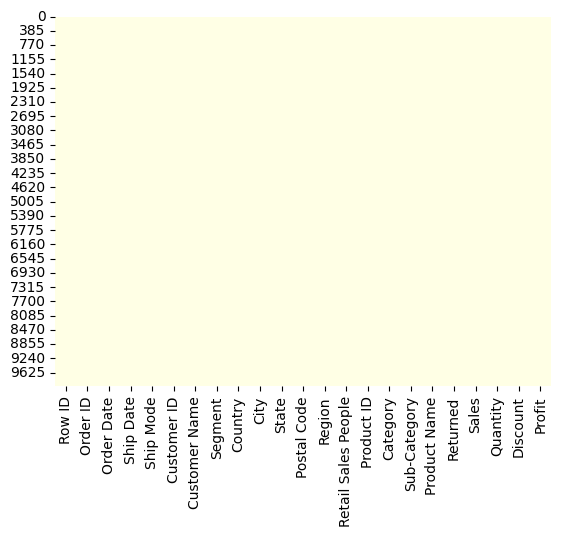

In [27]:
# Visualización de valores nulos
sns.heatmap(df.isnull(), cbar=False, cmap='YlOrBr')
plt.show()

#Confirmacion no posee valores nulos

# **Distribución de Variables**

In [13]:
# Estadísticas descriptivas
df.describe().T

count                           mean                  min  \
Row ID       9994.0                         4997.5                  1.0   
Order Date     9994  2016-04-11 07:17:44.078447104  2014-01-02 00:00:00   
Ship Date      9994  2016-05-15 21:54:47.332399360  2014-01-15 00:00:00   
Postal Code  9994.0                   55190.379428               1040.0   
Sales        9994.0                     229.858001                0.444   
Quantity     9994.0                       3.789574                  1.0   
Discount     9994.0                       0.156203                  0.0   
Profit       9994.0                      28.656896            -6599.978   

                             25%                  50%                  75%  \
Row ID                   2499.25               4997.5              7495.75   
Order Date   2015-05-01 00:00:00  2016-05-30 00:00:00  2017-04-09 00:00:00   
Ship Date    2015-06-20 00:00:00  2016-07-21 00:00:00  2017-06-02 00:00:00   
Postal Code              23223.0              56430.5              90008.0   
Sales                      17.28                54.49               209.94   
Quantity                     2.0                  3.0                  5.0   
Discount                     0.0                  0.2                  0.2   
Profit                   1.72875               8.6665               29.364   

                             max          std  
Row ID                    9994.0  2885.163629  
Order Date   2017-12-30 00:00:00          NaN  
Ship Date    2018-05-01 00:00:00          NaN  
Postal Code              99301.0  32063.69335  
Sales                   22638.48   623.245101  
Quantity                    14.0      2.22511  
Discount                     0.8     0.206452  
Profit                  8399.976   234.260108

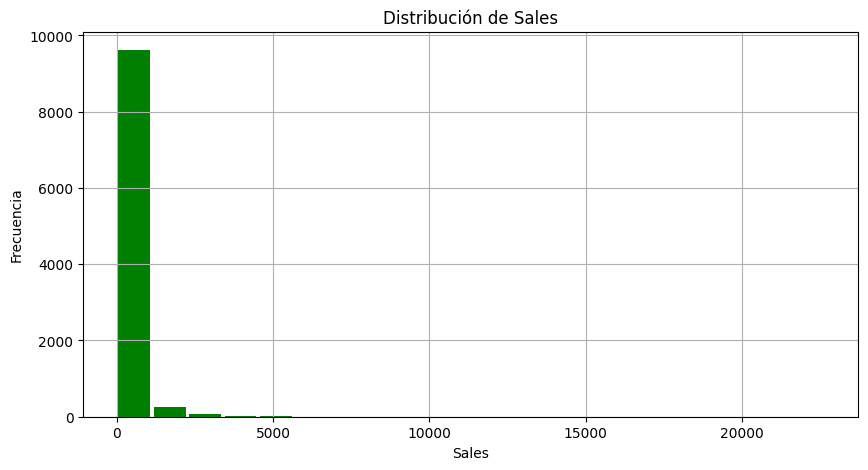

In [64]:
# Histograma
df['Sales'].hist(figsize=(10, 5), bins=20, color='green', rwidth=0.9)
plt.xlabel('Sales')
plt.ylabel('Frecuencia')
plt.title('Distribución de Sales')
plt.show()

# Frecuencias

In [71]:
# Categorias
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [72]:
# Sub-Categorias
df['Sub-Category'].value_counts()

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribución de Category')

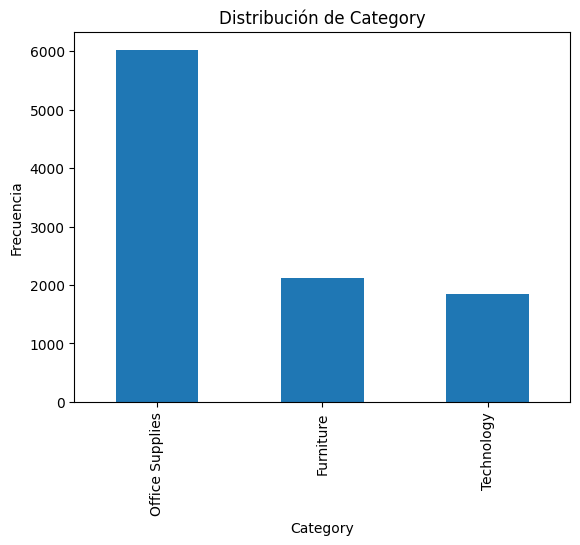

In [80]:
#Grafico de barras de categorias

df['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frecuencia')
plt.title('Distribución de Category')

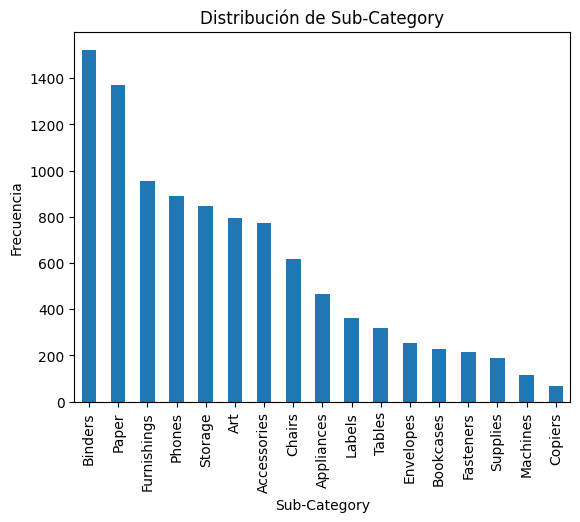

In [82]:
#Grafico de barras de sub-categorias

df['Sub-Category'].value_counts().plot(kind='bar')
plt.xlabel('Sub-Category')
plt.ylabel('Frecuencia')
plt.title('Distribución de Sub-Category');

# Análisis de Relaciones Entre Variables

In [16]:
#Creacion de dataset solo con variables numericas
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num

Row ID  Postal Code     Sales  Quantity  Discount    Profit
0          1        42420  261.9600         2      0.00   41.9136
1          2        42420  731.9400         3      0.00  219.5820
2          3        90036   14.6200         2      0.00    6.8714
3          4        33311  957.5775         5      0.45  383.0310
4          5        33311   22.3680         2      0.20    2.5164
...      ...          ...       ...       ...       ...       ...
9989    9990        33180   25.2480         3      0.20    4.1028
9990    9991        92627   91.9600         2      0.00   15.6332
9991    9992        92627  258.5760         2      0.20   19.3932
9992    9993        92627   29.6000         4      0.00   13.3200
9993    9994        92683  243.1600         2      0.00   72.9480

[9994 rows x 6 columns]

In [17]:
# Matriz de correlación
df_num.corr()

Row ID  Postal Code     Sales  Quantity  Discount    Profit
Row ID       1.000000     0.009671 -0.001359 -0.004016  0.013480  0.005416
Postal Code  0.009671     1.000000 -0.023854  0.012761  0.058443 -0.039860
Sales       -0.001359    -0.023854  1.000000  0.200795 -0.028190  0.787428
Quantity    -0.004016     0.012761  0.200795  1.000000  0.008623  0.143354
Discount     0.013480     0.058443 -0.028190  0.008623  1.000000  0.033194
Profit       0.005416    -0.039860  0.787428  0.143354  0.033194  1.000000

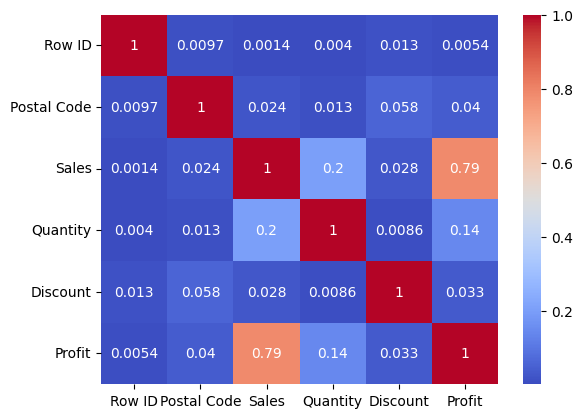

In [21]:
# Mapa de calor
sns.heatmap(abs(df_num.corr()), annot=True, cmap='coolwarm');

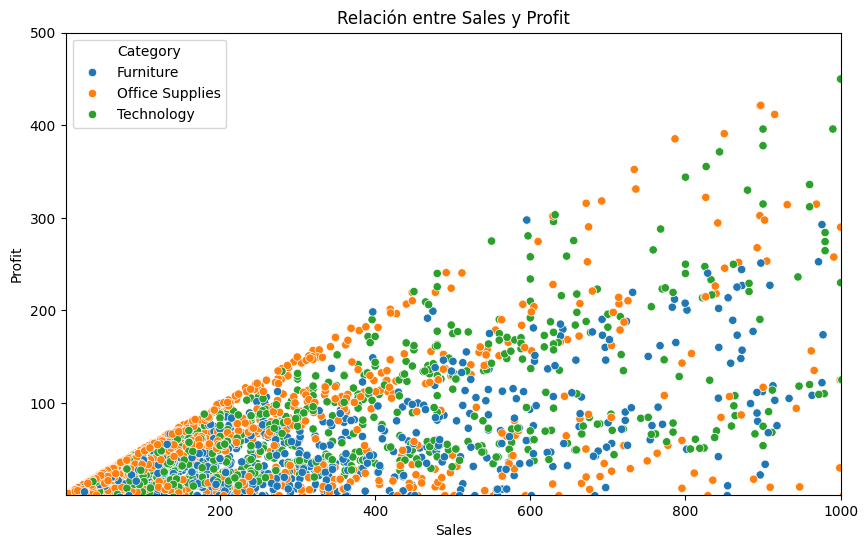

In [25]:
# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Relación entre Sales y Profit')
plt.xlim(1, 1000)
plt.ylim(1, 500);

#los beneficios son mayores con respecto a las ventas de 1 a 350

# Detección de Outliers

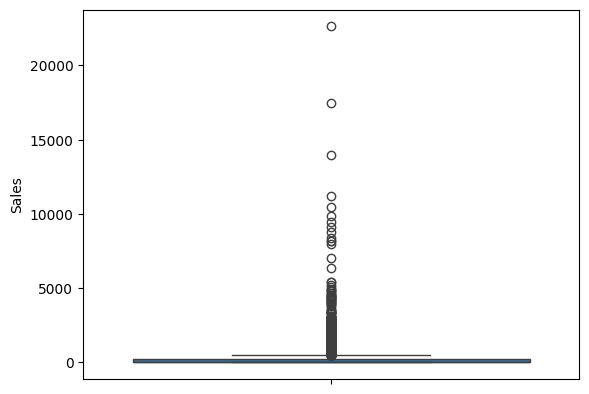

In [28]:
#Boxplot
sns.boxplot(data=df, y='Sales');

In [31]:
# Método IQR
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR))]
outliers

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
1          2  CA-2016-152156 2016-08-11 2016-11-11    Second Class   
3          4  US-2015-108966 2015-11-10 2015-11-10  Standard Class   
7          8  CA-2014-115812 2014-09-06 2014-09-06  Standard Class   
10        11  CA-2014-115812 2014-09-06 2014-09-06  Standard Class   
11        12  CA-2014-115812 2014-09-06 2014-09-06  Standard Class   
...      ...             ...        ...        ...             ...   
9931    9932  CA-2015-104948 2015-11-13 2015-11-17  Standard Class   
9942    9943  CA-2014-143371 2014-12-28 2015-03-01  Standard Class   
9947    9948  CA-2017-121559 2017-01-06 2017-03-06    Second Class   
9948    9949  CA-2017-121559 2017-01-06 2017-03-06    Second Class   
9968    9969  CA-2017-153871 2017-11-12 2017-12-17  Standard Class   

     Customer ID    Customer Name    Segment        Country             City  \
1       CG-12520      Claire Gute   Consumer  United States        Henderson   
3       SO-20335   Sean O'Donnell   Consumer  United States  Fort Lauderdale   
7       BH-11710  Brosina Hoffman   Consumer  United States      Los Angeles   
10      BH-11710  Brosina Hoffman   Consumer  United States      Los Angeles   
11      BH-11710  Brosina Hoffman   Consumer  United States      Los Angeles   
...          ...              ...        ...            ...              ...   
9931    KH-16510    Keith Herrera   Consumer  United States   San Bernardino   
9942    MD-17350    Maribeth Dona   Consumer  United States          Anaheim   
9947    HW-14935  Helen Wasserman  Corporate  United States     Indianapolis   
9948    HW-14935  Helen Wasserman  Corporate  United States     Indianapolis   
9968    RB-19435  Richard Bierner   Consumer  United States       Plainfield   

      ... Retail Sales People       Product ID         Category Sub-Category  \
1     ...   Cassandra Brandow  FUR-CH-10000454        Furniture       Chairs   
3     ...   Cassandra Brandow  FUR-TA-10000577        Furniture       Tables   
7     ...       Anna Andreadi  TEC-PH-10002275       Technology       Phones   
10    ...       Anna Andreadi  FUR-TA-10001539        Furniture       Tables   
11    ...       Anna Andreadi  TEC-PH-10002033       Technology       Phones   
...   ...                 ...              ...              ...          ...   
9931  ...       Anna Andreadi  FUR-BO-10004357        Furniture    Bookcases   
9942  ...       Anna Andreadi  OFF-ST-10001128  Office Supplies      Storage   
9947  ...      Kelly Williams  FUR-CH-10003746        Furniture       Chairs   
9948  ...      Kelly Williams  OFF-AP-10002945  Office Supplies   Appliances   
9968  ...         Chuck Magee  OFF-BI-10004600  Office Supplies      Binders   

                                           Product Name Returned      Sales  \
1     Hon Deluxe Fabric Upholstered Stacking Chairs,...      Not   731.9400   
3         Bretford CR4500 Series Slim Rectangular Table      Not   957.5775   
7                        Mitel 5320 IP Phone VoIP phone      Not   907.1520   
10             Chromcraft Rectangular Conference Tables      Not  1706.1840   
11        Konftel 250 Conference phone - Charcoal black      Not   911.4240   
...                                                 ...      ...        ...   
9931     O'Sullivan Living Dimensions 3-Shelf Bookcases      Not   683.3320   
9942        Carina Mini System Audio Rack, Model AR050B      Not   998.8200   
9947  Hon 4070 Series Pagoda Round Back Stacking Chairs      Not  1925.8800   
9948  Honeywell Enviracaire Portable HEPA Air Cleane...      Not  2405.2000   
9968          Ibico Ibimaster 300 Manual Binding System      Not   735.9800   

     Quantity Discount    Profit  
1           3     0.00  219.5820  
3           5     0.45 -383.0310  
7           6     0.20   90.7152  
10          9     0.20   85.3092  
11          4     0.20   68.3568  
...       ...      ...       ...  
9931        4     0.15  -40.1960  
9942        9 

# EDA generado automaticamente


In [9]:
report = ProfileReport(df)
report.to_file('report.html');

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
report

In [ ]:
#No hay valores nulos
#No hay valores duplicados
#Solo hay valores con correlaciones de 0.7 que se ve en el mapa de calor tomando en cuenta solo los numéricos

# Feature Engineering

In [22]:
df.head()

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-08-11 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-12-06 2016-12-06    Second Class    DV-13045   
3       4  US-2015-108966 2015-11-10 2015-11-10  Standard Class    SO-20335   
4       5  US-2015-108966 2015-11-10 2015-11-10  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Retail Sales People       Product ID         Category Sub-Category  \
0   Cassandra Brandow  FUR-BO-10001798        Furniture    Bookcases   
1   Cassandra Brandow  FUR-CH-10000454        Furniture       Chairs   
2       Anna Andreadi  OFF-LA-10000240  Office Supplies       Labels   
3   Cassandra Brandow  FUR-TA-10000577        Furniture       Tables   
4   Cassandra Brandow  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name Returned     Sales  \
0                  Bush Somerset Collection Bookcase      Not  261.9600   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...      Not  731.9400   
2  Self-Adhesive Address Labels for Typewriters b...      Not   14.6200   
3      Bretford CR4500 Series Slim Rectangular Table      Not  957.5775   
4                     Eldon Fold 'N Roll Cart System      Not   22.3680   

  Quantity Discount    Profit  
0        2     0.00   41.9136  
1        3     0.00  219.5820  
2        2     0.00    6.8714  
3        5     0.45 -383.0310  
4        2     0.20    2.5164  

[5 rows x 23 columns]

## Convirtiendo valores de fecha a datetime



In [29]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [32]:
df['Order Date']

0      2016-08-11
1      2016-08-11
2      2016-12-06
3      2015-11-10
4      2015-11-10
          ...    
9989   2014-01-21
9990   2017-02-26
9991   2017-02-26
9992   2017-02-26
9993   2017-04-05
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [33]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [35]:
df['Ship Date']

0      2016-11-11
1      2016-11-11
2      2016-12-06
3      2015-11-10
4      2015-11-10
          ...    
9989   2014-01-23
9990   2017-03-03
9991   2017-03-03
9992   2017-03-03
9993   2017-09-05
Name: Ship Date, Length: 9994, dtype: datetime64[ns]

In [36]:
#Se crea una columna para el año de la orden
df['Order Year'] = df['Order Date'].dt.year

In [37]:
df['Order Year']

0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9989    2014
9990    2017
9991    2017
9992    2017
9993    2017
Name: Order Year, Length: 9994, dtype: int32

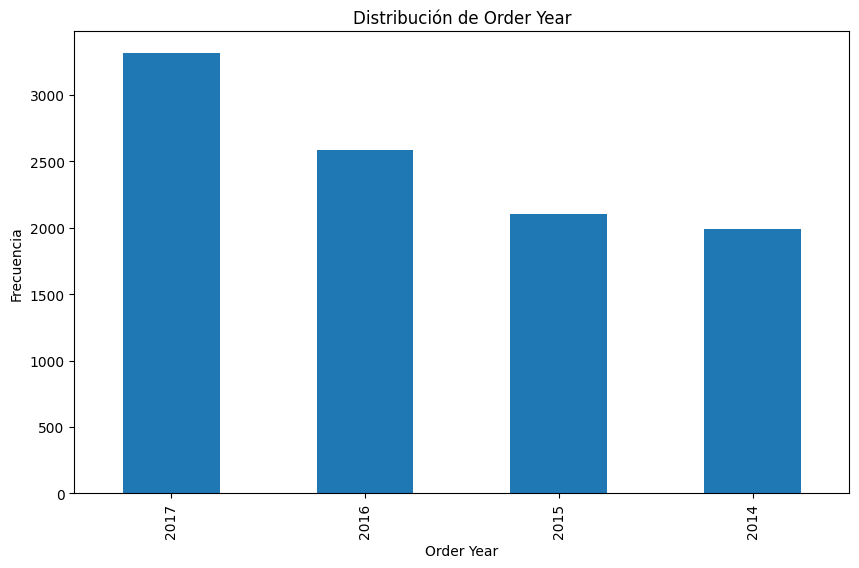

In [39]:
#Grafica de ordenes por año
plt.figure(figsize=(10, 6))
df['Order Year'].value_counts().plot(kind='bar')
plt.xlabel('Order Year')
plt.ylabel('Frecuencia')
plt.title('Distribución de Order Year');